# Number recognition for Persian OCR

## 1. Data generation

In [1]:
import cv2
import zarnevis

In [2]:
import os # For working with directories and files

## 1.1. Generating blank image

In [3]:
import numpy as np

In [62]:
image = np.zeros((75, 255, 3), np.uint8)

In [6]:
import matplotlib.pyplot as plt

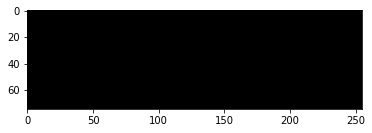

In [41]:
%matplotlib inline

plt.imshow(image)

## 1.2. Writing a simple number on the blank image

In [63]:
processor = zarnevis.Zarnevis(image=image, text="۱۲۳۴", font_file='fonts/shabnam.ttf', font_size=36, text_coords=(90,10), color=(255, 255, 255))

In [64]:
image = processor.draw_text()

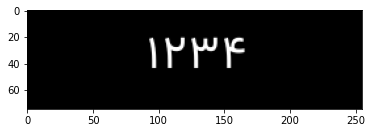

In [65]:
%matplotlib inline

plt.imshow(image)

## 1.3. Developing a function for generating the desired image

In [104]:
def numbers_on_pics(number, font):
    font = f'fonts/{font}.ttf'
    image = np.zeros((75,255,3), np.uint8)
    processor = zarnevis.Zarnevis(image=image, text=number, font_file=font, font_size=36, text_coords=(90,10), color=(255, 255, 255))
    image = processor.draw_text()
    
    return image

In [75]:
image = numbers_on_pics("۲۳۴۵", 'shabnam')

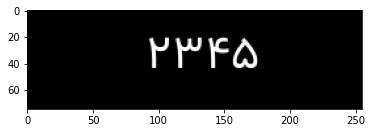

In [76]:
%matplotlib inline

plt.imshow(image)

## 1.4. Developing a function for translating latin numbers to Persian ones

In [78]:
_translator = str.maketrans("1234567890", "۱۲۳۴۵۶۷۸۹۰")

def latin_to_persian(number):
    return number.translate(_translator)

In [80]:
latin_to_persian("54321")

'۵۴۳۲۱'

## 1.5. Generating the desired data

In [81]:
from uuid import uuid4 # For naming the files

### 1.5.1. Generating a bunch of random numbers for our dataset

In [91]:
import random

random.seed()

In [111]:
random_numbers = []

counter = 0

while counter < 30:
    random_numbers.append(str(random.randrange(1000, 10000)))
    counter += 1

In [112]:
random_numbers

['8041',
 '8415',
 '3303',
 '6142',
 '3342',
 '8449',
 '6786',
 '6170',
 '6566',
 '5265',
 '5934',
 '3986',
 '6166',
 '7124',
 '4041',
 '2821',
 '8195',
 '2332',
 '1236',
 '7009',
 '1440',
 '4824',
 '5524',
 '3457',
 '4990',
 '6530',
 '7249',
 '3983',
 '8250',
 '9532']

In [114]:
for num in random_numbers:
    num = latin_to_persian(num)
    image = numbers_on_pics(num, 'shabnam')
    cv2.imwrite(f'images/{uuid4()}.jpg', image)

## 2. Labeling the data

Now, the generated data should be labeled. This data must be labeled outside this notebook. But you can download labeled dataset [here](). 

## 3. Inference

In [115]:
import torch
import pandas as pd
import numpy as np

## 3.1. SSL problem on macOS

If you're on a mac, it's recommended to run the following cell. If you get SSL related errors on Windows or GNU/Linux, you should run it. Otherwise, it's not necessary.

In [116]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## 3.2. Load the model

In [117]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/numbers.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-16 Python-3.8.6 torch-1.10.0 CPU

Fusing layers... 
Model summary: 290 layers, 20889303 parameters, 0 gradients, 48.1 GFLOPs
Adding AutoShape... 


## 3.3. Model inference

In [123]:
image = cv2.imread('../inference.png')

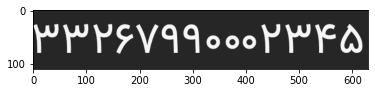

In [128]:
%matplotlib inline

plt.imshow(image)

In [125]:
result = model(image.copy())
result.print()

image 1/1: 110x630 2 2s, 3 3s, 1 4, 1 5, 1 6, 1 7, 2 9s, 4 0s
Speed: 1.6ms pre-process, 160.5ms inference, 0.6ms NMS per image at shape (1, 3, 128, 640)


## 3.4. Let's render using YOLOv5 render function

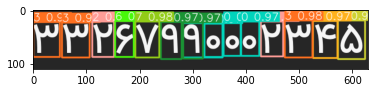

In [127]:
%matplotlib inline

plt.imshow(np.squeeze(result.render()))

## 4. Developing OCR functions